In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

In [3]:
iris = load_iris()
X = iris.data
y = iris.target


In [4]:
unique, counts = np.unique(y, return_counts=True)
frequency = dict(zip(unique, counts))

print(frequency)

{np.int64(0): np.int64(50), np.int64(1): np.int64(50), np.int64(2): np.int64(50)}


In [5]:
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)  # we know Iris has 3 classes
y_kmeans = kmeans.fit_predict(X)

In [26]:
df = pd.DataFrame({
    'True Label': y,
    'Cluster': y_kmeans,
    'Result Label': (y == y_kmeans).astype(int)
})
df

,True Label,Cluster,Result Label
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
145,2,0,0
146,2,2,1
147,2,0,0
148,2,0,0


In [18]:
import matplotlib.pyplot as plt

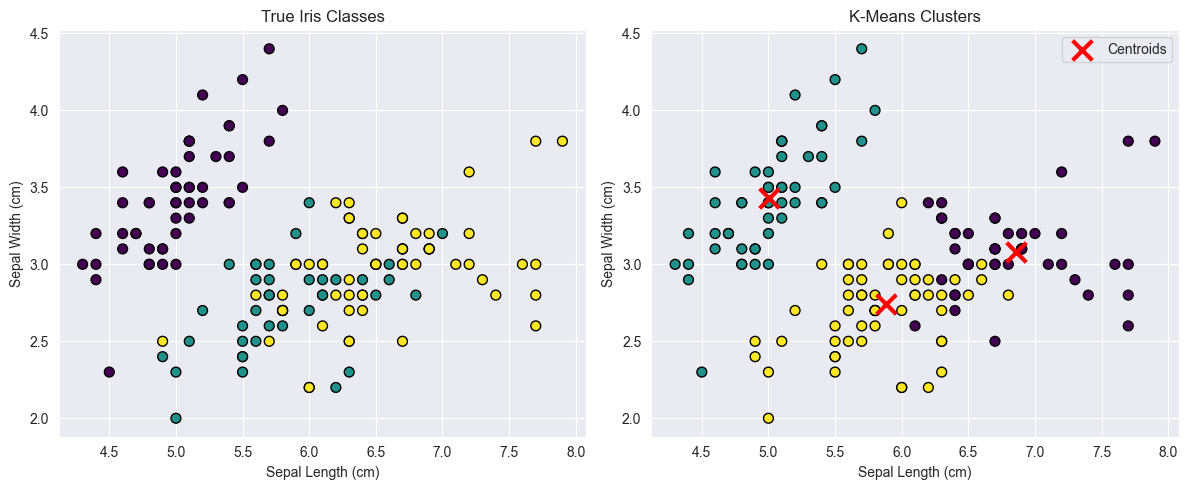

In [19]:
# Visualize the clusters
plt.figure(figsize=(12, 5))

# Plot 1: True Labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('True Iris Classes')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Plot 2: K-Means Clusters
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.title('K-Means Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

plt.tight_layout()plt.show()

In [27]:

# Cross-tabulation: True labels vs. Clusters
cluster_species_table = pd.crosstab(y_kmeans, y, rownames=['Cluster'], colnames=['True Species'])
print("Cluster vs. True Species Cross-Tabulation:")
print(cluster_species_table)
print("\nCluster-Species Correspondence (Majority Assignment):")
for cluster in range(3):
    majority_species = cluster_species_table.loc[cluster].idxmax()
    count = cluster_species_table.loc[cluster].max()
    total_in_cluster = cluster_species_table.loc[cluster].sum()
    accuracy = count / total_in_cluster
    print(f"Cluster {cluster}: Mostly {majority_species} (accuracy: {accuracy:.2f})")

Cluster vs. True Species Cross-Tabulation:
True Species   0   1   2
Cluster                 
0              0   3  36
1             50   0   0
2              0  47  14

Cluster-Species Correspondence (Majority Assignment):
Cluster 0: Mostly 2 (accuracy: 0.92)
Cluster 1: Mostly 0 (accuracy: 1.00)
Cluster 2: Mostly 1 (accuracy: 0.77)
